# Correlation analysis 

<div class="alert alert-success" role="alert">
    <strong>Summary:</strong><br> This notebook calculates the correlation between each apartment to form groups with similar consumption patterns. The first section of the notebook determines the correlation between apartments using the time-series method over a five-day period. The second section works out the correlation using the hourly mean of the different apartments over a ten-day span. The third part analyses the correlation of each apartment with a resample of 3-hour per day. It explores then the relationship between the apartments over a period of the day. This section is still based on the analysis of a three-hourly-mean over the span of ten-day. The fourth section of the notebook explores the relationship of the apartments when the day is divided by four period. This section is still based on the analysis of a six-hourly-mean over the span of ten-day.
</div>

Import the needed modules in the notebook.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler

Get the list of the files containing the Domestic Hot Water (DHW) consumption data using the key work 'IECS'.

In [2]:
folder = r"./Data/"
files = os.listdir(folder)
#Get a list of the different files named IECS
list_IECS = [file for file in files if '-IECS' in file]   
list_IECS.sort()

Read the csv file and resample the data for 10 min.

In [3]:
data = {} #Creation of a dictionary
for file in list_IECS:
    df = pd.read_csv(folder + file) #Read the csv file
    ts = df.set_index('0')['Value']     # DataFrame -> TimeSeries
    ts.index = pd.to_datetime(ts.index, unit='s')   # index to secondes
    ts = ts.resample("10Min").mean()    # resample 10 min
    data[file[:-4]] = ts 

Create dataframe from the data got previously.

In [4]:
df = pd.DataFrame(data)
df = df[~df.isnull().any(axis=1)]  # remove the row with Nan Value

Conversion of the water consumption from l/s to l/h.

In [5]:
df=df*3600
#print(df)

## Time-series analysis

<div class="alert alert-info">
<strong>Details :</strong><br>
Starting by getting the data of the five-day period, resample the data for one-hour and then work out the correlation between the apartment over the consecutive five days.
</div>

In [6]:
df1=df['2020-12-07 00:00:00' : '2020-12-12 00:00:00']
df1h = df1.resample("H").mean() 

Working out the correlation matrice and plot it.

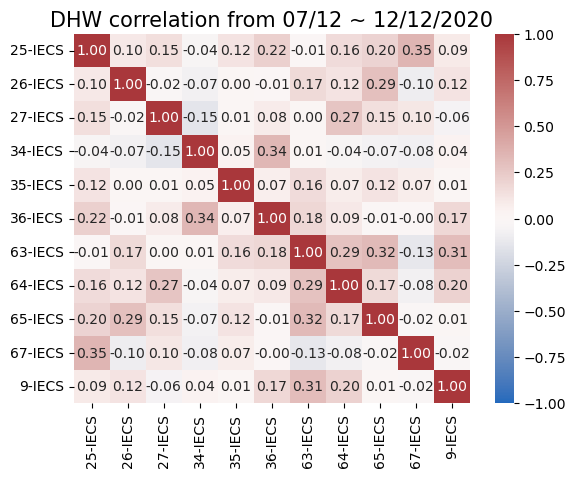

In [7]:
df1h_corr = df1h.corr() # Correlation matrice of df1h
sn.heatmap(df1h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f') #Creating a scale to visualize the correlation
plt.title('DHW correlation from 07/12 ~ 12/12/2020', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

We repeat it adding one day to our dataset.

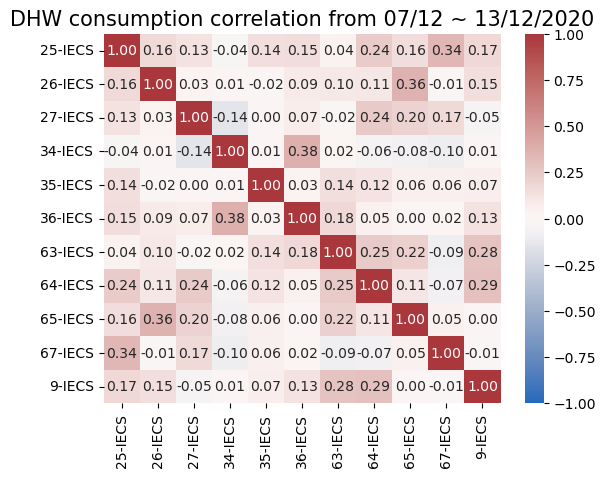

In [8]:
df2=df['2020-12-07 00:00:00' : '2020-12-13 00:00:00']
df2h = df2.resample("H").mean() 
df2h_corr = df2h.corr()
sn.heatmap(df2h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW consumption correlation from 07/12 ~ 13/12/2020', fontsize=15)
plt.show()

We repeat the process shifting the month of the dataset.

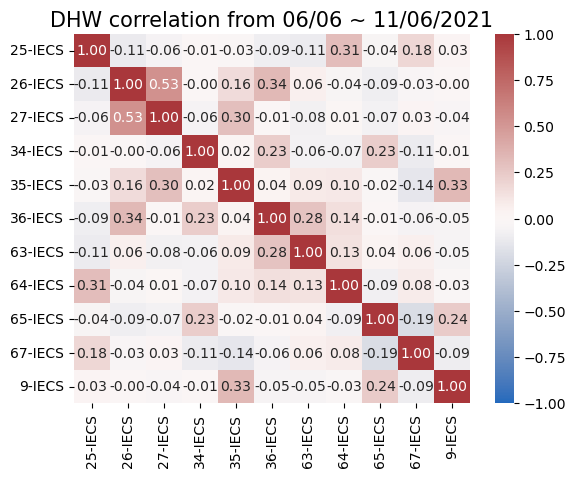

In [9]:
df3=df['2021-06-06 00:00:00' : '2021-06-11 00:00:00']
df3h = df3.resample("H").mean() 
df3h_corr = df3h.corr()
sn.heatmap(df3h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 06/06 ~ 11/06/2021', fontsize=15)
plt.show()

## Hour mean analysis

<div class="alert alert-info">
<strong>Details :</strong><br>
Starting by getting the data of the ten-day period, resample the data for one-hour. Subsequently, we calculate the hourly-mean of each apartments over the ten-day span. The resulting data is visualized through plotting to observe it. Then the correlation analysis is made to compare each apartments together.
</div>


In [10]:
df4=df['2020-12-07 00:00:00' : '2020-12-17 00:00:00']
df4h = df4.resample("H").mean()
df4h = df4h.groupby(df4h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df4h)

Getting the max, min and standard deviation values for each apartments

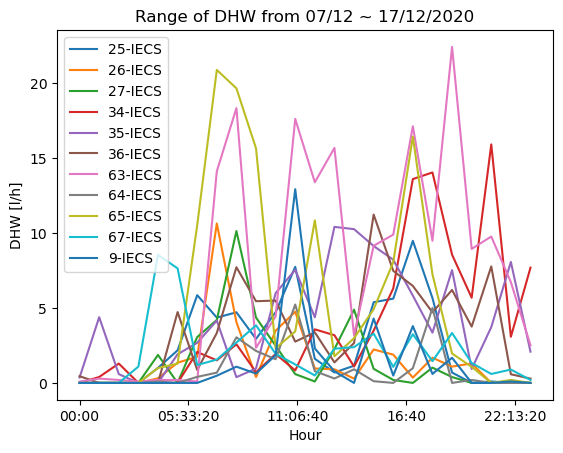

In [11]:
df4h_max=df4h.max()
df4h_min=df4h.min()
df4h_standard_deviation=df4h.std()


df4h_minus_std=df4h-df4h_standard_deviation
#print(df4h_minus_std)
#To do: Mettre à 0 les valeurs négatives


df4h_plus_std=df4h+df4h_standard_deviation
#print(df4h_plus_std)

#Plot every mean values

ac= df4h.plot(xlabel='Hour', ylabel='DHW [l/h]')
ac.set_title('Range of DHW from 07/12 ~ 17/12/2020')
plt.show()

Represent the consumption range for each apartment across different hours, along with their respective standard deviations.
To achieve it, we convert the data into numpy format.
This conversion is necessary because the fill_between function works with numpy values and one-dimensional arrays. 
Consequently, the data must be transformed into numpy format and applied individually to each apartment using this function.

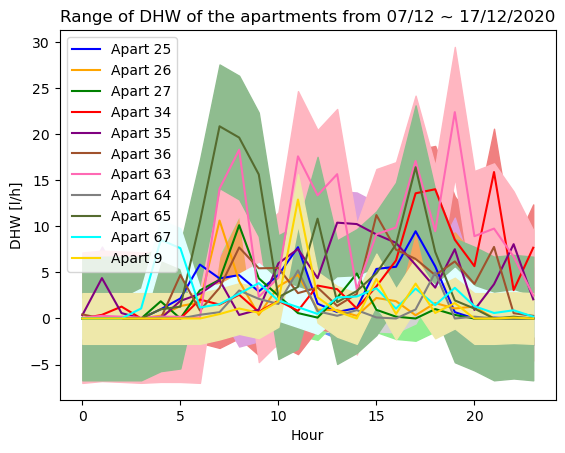

In [12]:

x=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23 ]) #x represents the hour of the day where the value are taken

#Plot the range of the apartment 25 with its standard deviation and mean value.
plt.plot(x,df4h['25-IECS'].to_numpy(), label='Apart 25', color='blue', ) #Plot the mean value for each apartment
plt.fill_between(x, df4h_minus_std['25-IECS'].to_numpy(), df4h_plus_std['25-IECS'].to_numpy(), color='cornflowerblue') #Plot the standard deviation bands

#Repeat it for each apartments
plt.plot(x,df4h['26-IECS'].to_numpy(), label='Apart 26',color='orange' ) 
plt.fill_between(x, df4h_minus_std['26-IECS'].to_numpy(), df4h_plus_std['26-IECS'].to_numpy(), color='bisque') 

plt.plot(x,df4h['27-IECS'].to_numpy(), label='Apart 27',color='green' ) #Plot the mean value for each apartment
plt.fill_between(x, df4h_minus_std['27-IECS'].to_numpy(), df4h_plus_std['27-IECS'].to_numpy(), color='lightgreen') 

plt.plot(x,df4h['34-IECS'].to_numpy(), label='Apart 34',color='red' ) 
plt.fill_between(x, df4h_minus_std['34-IECS'].to_numpy(), df4h_plus_std['34-IECS'].to_numpy(), color='lightcoral') 

plt.plot(x,df4h['35-IECS'].to_numpy(), label='Apart 35',color='purple' )
plt.fill_between(x, df4h_minus_std['35-IECS'].to_numpy(), df4h_plus_std['35-IECS'].to_numpy(), color='plum') 

plt.plot(x,df4h['36-IECS'].to_numpy(),label='Apart 36', color='sienna' ) 
plt.fill_between(x, df4h_minus_std['36-IECS'].to_numpy(), df4h_plus_std['36-IECS'].to_numpy(), color='sandybrown') 

plt.plot(x,df4h['63-IECS'].to_numpy(),label='Apart 63', color='hotpink' ) 
plt.fill_between(x, df4h_minus_std['63-IECS'].to_numpy(), df4h_plus_std['63-IECS'].to_numpy(), color='lightpink') 

plt.plot(x,df4h['64-IECS'].to_numpy(), label='Apart 64',color='grey' ) 
plt.fill_between(x, df4h_minus_std['64-IECS'].to_numpy(), df4h_plus_std['64-IECS'].to_numpy(), color='lightgrey') 

plt.plot(x,df4h['65-IECS'].to_numpy(), label='Apart 65',color='darkolivegreen' ) 
plt.fill_between(x, df4h_minus_std['65-IECS'].to_numpy(), df4h_plus_std['65-IECS'].to_numpy(), color='darkseagreen') 

plt.plot(x,df4h['67-IECS'].to_numpy(), label='Apart 67',color='cyan' ) 
plt.fill_between(x, df4h_minus_std['67-IECS'].to_numpy(), df4h_plus_std['67-IECS'].to_numpy(), color='lightcyan') 

plt.plot(x,df4h['9-IECS'].to_numpy(), label='Apart 9', color='gold' ) 
plt.fill_between(x, df4h_minus_std['9-IECS'].to_numpy(), df4h_plus_std['9-IECS'].to_numpy(), color='palegoldenrod') 

plt.legend()
plt.xlabel('Hour')
plt.ylabel('DHW [l/h]')
plt.title('Range of DHW of the apartments from 07/12 ~ 17/12/2020')
plt.show()

We work out the correlation based on the ten-day average.

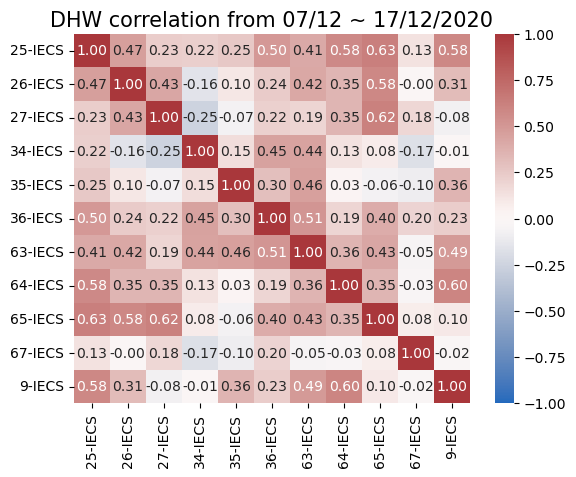

In [13]:
df4h_corr = df4h.corr()
sn.heatmap(df4h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/12 ~ 17/12/2020', fontsize=15)
plt.show()

We repeat the process with a one-day shift in the dataset.

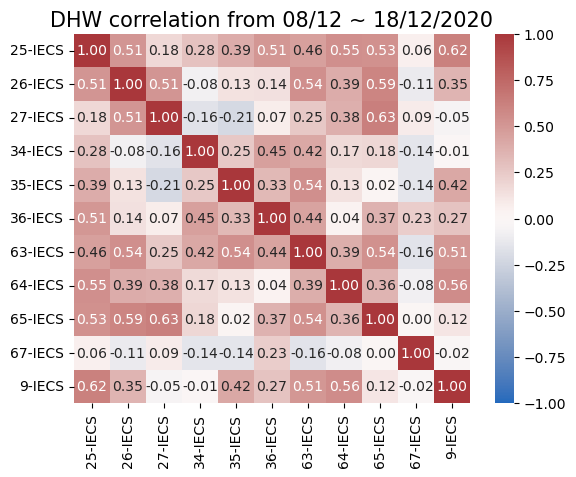

In [14]:
df5=df['2020-12-08 00:00:00' : '2020-12-18 00:00:00']
df5h = df5.resample("H").mean()
df5h = df5h.groupby(df5h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df5h)
df5h_corr = df5h.corr()
sn.heatmap(df5h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/12 ~ 18/12/2020', fontsize=15)
plt.show()

We repeat it shifting the month of the dataset.

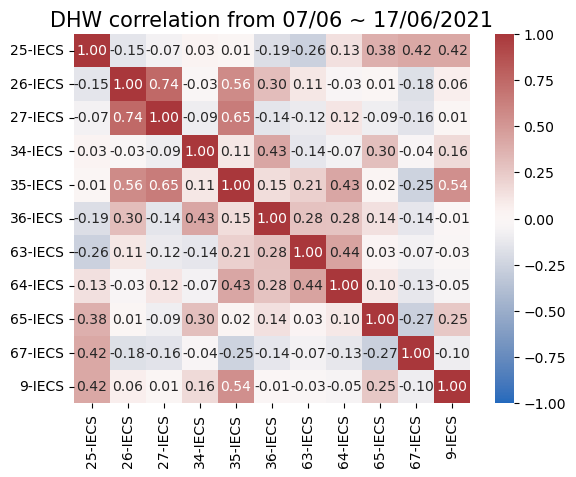

In [15]:
df6=df['2021-06-07 00:00:00' : '2021-06-17 00:00:00']
df6h = df6.resample("H").mean()
df6h = df6h.groupby(df6h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df5h)
df6h_corr = df6h.corr()
sn.heatmap(df6h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/06 ~ 17/06/2021', fontsize=15)
plt.show()

We replicate the process with a one-day shift in the dataset from the previous analysis.

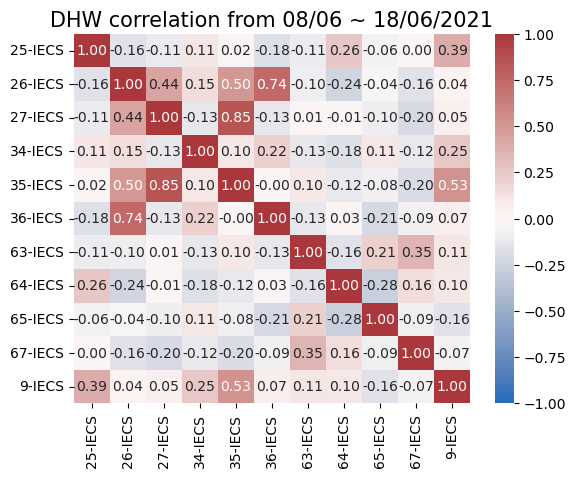

In [16]:
df7=df['2021-06-08 00:00:00' : '2021-06-18 00:00:00']
df7h = df7.resample("H").mean()
df7h = df7h.groupby(df7h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df7h)
df7h_corr = df7h.corr()
sn.heatmap(df7h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/06 ~ 18/06/2021', fontsize=15)
plt.show()

# Morning and afternoon resample analysis _ 3 hours

<div class="alert alert-info">
<strong>Details :</strong><br>
Starting by getting the data of the ten-day period, resample the data for three-hour. Subsequently, we calculate the three hourly-mean of each apartments over the ten-day span. The resulting data is visualized through plotting to observe it. Then the correlation analysis is made to compare each apartments together.
    Using a resample of three-hour allow us to visualize the morning and afternoon information
</div>

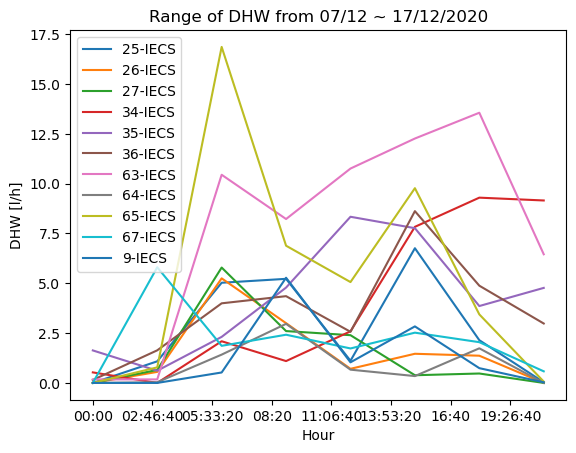

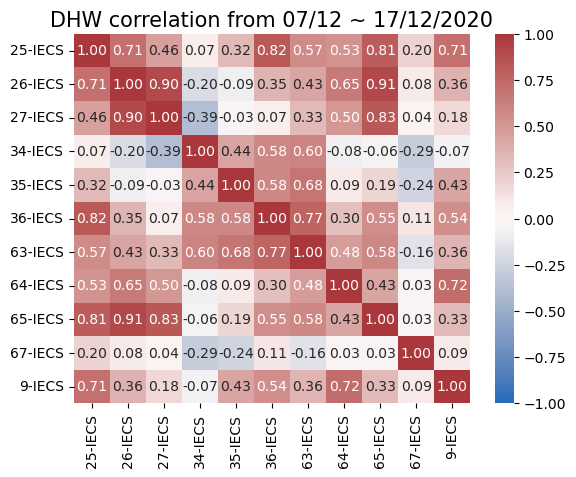

In [30]:
df8=df['2020-12-07 00:00:00' : '2020-12-17 00:00:00']
df8h = df8.resample("3H").mean()
df8h = df8h.groupby(df8h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df8h)

ac1= df8h.plot(xlabel='Hour', ylabel='DHW [l/h]')
ac1.set_title('Range of DHW from 07/12 ~ 17/12/2020')
plt.show()

df8h_corr = df8h.corr()
sn.heatmap(df8h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/12 ~ 17/12/2020', fontsize=15)
plt.show()

We replicate the process shifting one day.

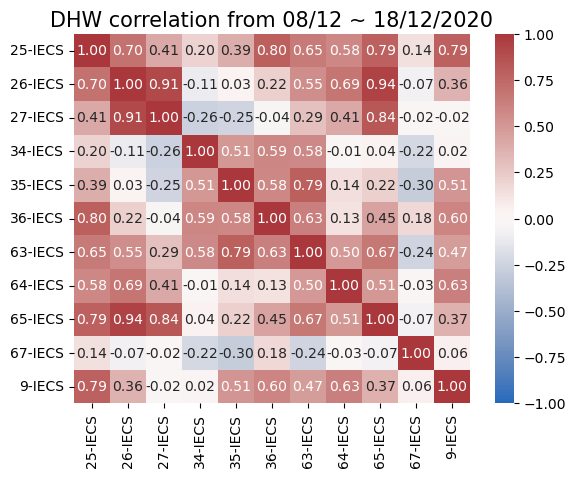

In [29]:
df9=df['2020-12-08 00:00:00' : '2020-12-18 00:00:00']
df9h = df9.resample("3H").mean()
df9h = df9h.groupby(df9h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df9h)

df9h_corr = df9h.corr()
sn.heatmap(df9h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/12 ~ 18/12/2020', fontsize=15)
plt.show()

We repeat it shifting the month to June.

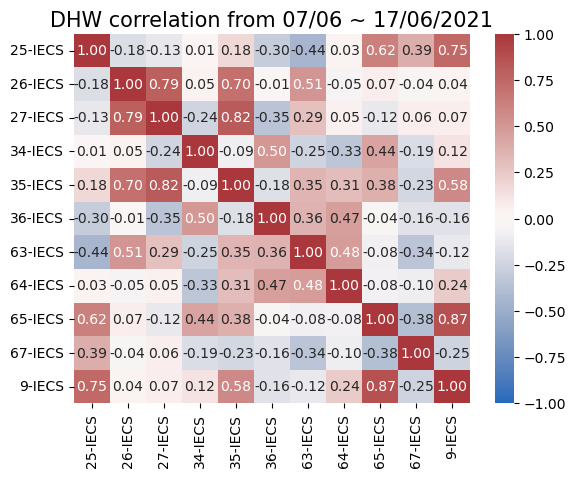

In [32]:
df10=df['2021-06-07 00:00:00' : '2021-06-17 00:00:00']
df10h = df10.resample("3H").mean()
df10h = df10h.groupby(df10h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df10h)

df10h_corr = df10h.corr()
sn.heatmap(df10h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/06 ~ 17/06/2021', fontsize=15)
plt.show()

Shifting one day

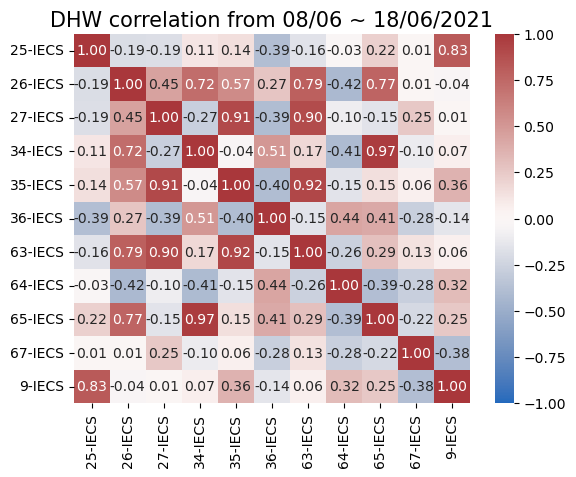

In [33]:
df11=df['2021-06-08 00:00:00' : '2021-06-18 00:00:00']
df11h = df11.resample("3H").mean()
df11h = df11h.groupby(df11h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df11h)
df11h_corr = df11h.corr()
sn.heatmap(df11h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/06 ~ 18/06/2021', fontsize=15)
plt.show()

# Morning and afternoon resample analysis _ 6 hours

<div class="alert alert-info">
<strong>Details :</strong><br>
Starting by getting the data of the ten-day period, resample the data for six-hour. Subsequently, we calculate the three hourly-mean of each apartments over the ten-day span. The resulting data is visualized through plotting to observe it. Then the correlation analysis is made to compare each apartments together.
    Using a resample of three-hour allow us to visualize the day divided by four period: morning night, morning, afternoon, late afternoon and beginning of the night.
</div>

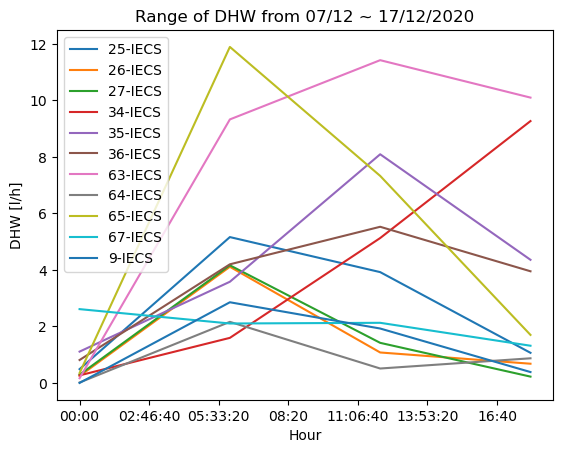

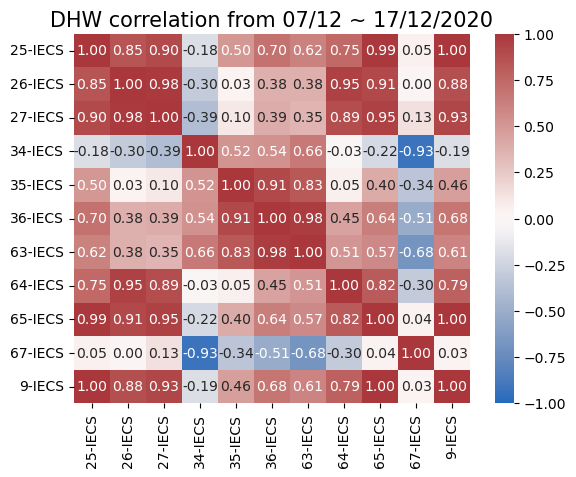

In [35]:
df12=df['2020-12-07 00:00:00' : '2020-12-17 00:00:00']
df12h = df12.resample("6H").mean()
df12h = df12h.groupby(df12h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df12h)

ac2= df12h.plot(xlabel='Hour', ylabel='DHW [l/h]')
ac2.set_title('Range of DHW from 07/12 ~ 17/12/2020')
plt.show()

df12h_corr = df12h.corr()
sn.heatmap(df12h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/12 ~ 17/12/2020', fontsize=15)
plt.show()

Repeating the process shifting one-day

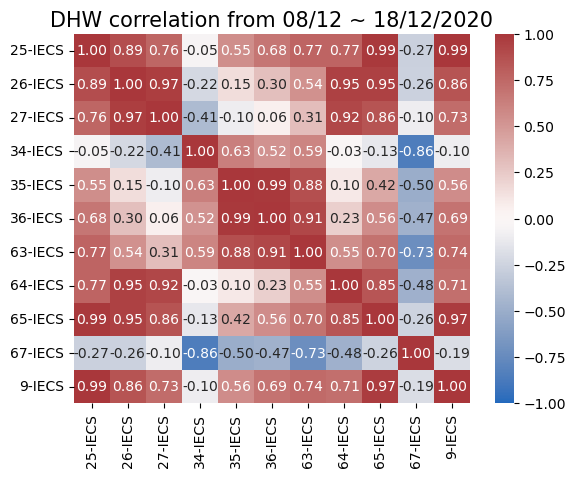

In [36]:
df13=df['2020-12-08 00:00:00' : '2020-12-18 00:00:00']
df13h = df13.resample("6H").mean()
df13h = df13h.groupby(df13h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df13h)

df13h_corr = df13h.corr()
sn.heatmap(df13h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/12 ~ 18/12/2020', fontsize=15)
plt.show()

Shifting the month to June

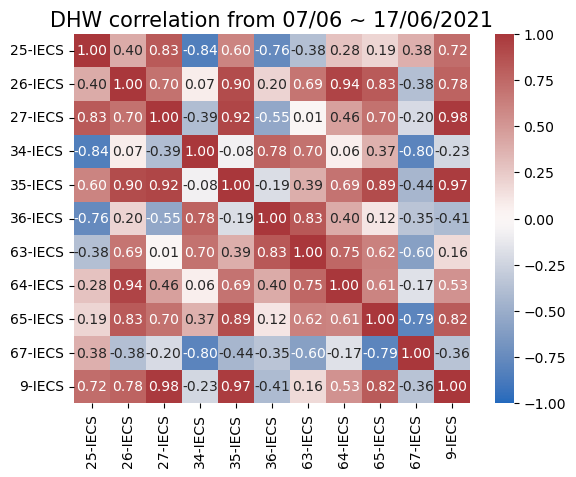

In [37]:
df14=df['2021-06-07 00:00:00' : '2021-06-17 00:00:00']
df14h = df14.resample("6H").mean()
df14h = df14h.groupby(df14h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df14h)

df14h_corr = df14h.corr()
sn.heatmap(df14h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/06 ~ 17/06/2021', fontsize=15)
plt.show()

Shifting one day

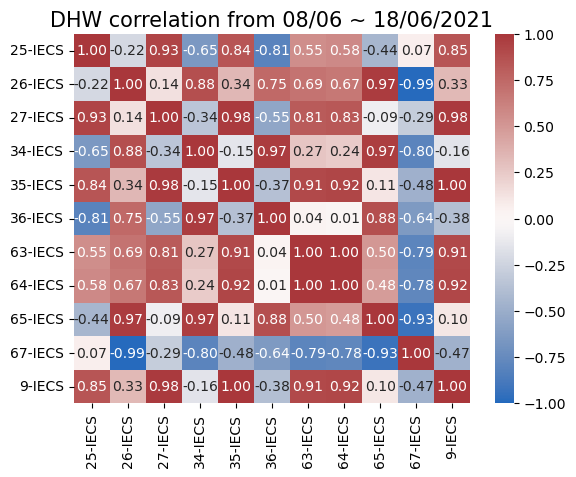

In [38]:
df15=df['2021-06-08 00:00:00' : '2021-06-18 00:00:00']
df15h = df15.resample("6H").mean()
df15h = df15h.groupby(df15h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df15h)
df15h_corr = df15h.corr()
sn.heatmap(df15h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/06 ~ 18/06/2021', fontsize=15)
plt.show()